In [31]:
import tensorflow as tf

print(tf.__version__)


2.3.0


In [32]:
#load data
fmnist = tf.keras.datasets.fashion_mnist
print(fmnist)

<module 'tensorflow.keras.datasets.fashion_mnist' from 'C:\\Users\\LENOVO\\anaconda3\\envs\\deeplearning\\lib\\site-packages\\tensorflow\\keras\\datasets\\fashion_mnist\\__init__.py'>


In [33]:
#fmnist.load_data()

In [34]:
fmnist

<module 'tensorflow.keras.datasets.fashion_mnist' from 'C:\\Users\\LENOVO\\anaconda3\\envs\\deeplearning\\lib\\site-packages\\tensorflow\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [35]:
(training_img, training_label), (test_img, test_label) = fmnist.load_data()

In [36]:
import numpy as np 
import matplotlib.pyplot as plt

In [37]:
#define the index or the image that want to plot
index = 0

In [38]:
# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

In [39]:
#print label and image
print(f'Label : ',training_label)
print(f'Label : ', test_label)

Label :  [9 0 0 ... 3 0 5]
Label :  [9 2 1 ... 8 1 5]


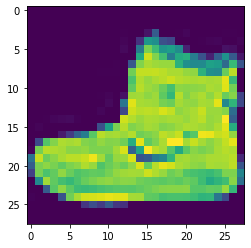

In [40]:
#visualize the image according the indek
plt.imshow(training_img[index])

### Normalisasi Gambar
- normalisasi gambar bertujuan untuk mempermudah NN untuk memperoses karena informasi pixel akan direpresentasikan pada interval 0-1

In [41]:
#normalize the image train and image test
training_img = training_img/255.0
test_img = test_img/255.0

In [42]:
training_img.shape

(60000, 28, 28)

In [43]:
test_img.shape

(10000, 28, 28)

### membuat model NN
- model kali ini dibuat dari data sets train dan test yang bertujuan untuk mengukur seberapa akurat mesin belajar
- beberapa syntax hyperparameter yg digunakan
<br> Sequential -> membuat model urutan neuran
<br> Flatter -> meratakan dimensi (mengkalikan dimensi) agar menjadi 1 dimensi
<br> Dense -> membuat Neuron, yg akan memaksa input memiliki output sesuat dengan banyaknya neuron
<br> Relu -> menghilangkan angka vektor negatif (non negatif model)
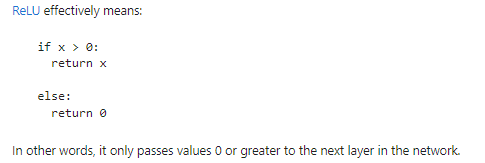
<br> Softmax -> menormalisasi vektor kedalam skala probabilitas 0-1 dan jumlah semua angka vektornya akan bernilai 1

In [50]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

### Demonstrate the softmax activation

In [51]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


### compile and fit the model
<br> The next thing to do, now that the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling model.fit() asking it to fit your training data to your training labels. It will figure out the relationship between the training data and its actual labels so in the future if you have inputs that looks like the training data, then it can predict what the label for that input is

In [55]:
model.compile(optimizer =tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics =['accuracy'])

model.fit(training_img, training_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4994 - accuracy: 0.8238
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3751 - accuracy: 0.8646
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3361 - accuracy: 0.8779
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3120 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2964 - accuracy: 0.8914


### Evaluate model

In [57]:
# Evaluate the model on unseen data
model.evaluate(test_img, test_label)

313/313 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.8698


[0.3573937714099884, 0.8697999715805054]

### exercise 1
<br> For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?

In [62]:
classifications = model.predict(test_img)

print(classifications[1])

[3.2886939e-07 5.0841033e-12 9.9721861e-01 6.4682848e-10 2.6768325e-03 2.4388365e-11 1.0417961e-04 6.4131880e-14 2.8108541e-08 7.9058235e-15]


In [61]:
print(test_label[1])

2


E1Q1: What does this list represent?
It's 10 random meaningless values
It's the first 10 classifications that the computer made
It's the probability that this item is each of the 10 classes
Click for Answer
#### Answer: The correct answer is (3) The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities. For index 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that the image is most likely an ankle boot.

E1Q2: How do you know that this list tells you that the item is an ankle boot?
There's not enough information to answer that question
The 10th element on the list is the biggest, and the ankle boot is labelled 9
The ankle boot is label 9, and there are 0->9 elements in the list
Click for Answer
#### Answer The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

### Exercise 3
<br> Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case

In [64]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1842 - accuracy: 0.9452
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0748 - accuracy: 0.9768
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0497 - accuracy: 0.9843
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0345 - accuracy: 0.9887
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0701 - accuracy: 0.9804
[2.9476157e-09 2.6594754e-10 1.0860532e-07 1.2570181e-06 6.8187280e-13 8.2277694e-08 5.1555474e-12 9.9999607e-01 1.0616796e-08 2.4755684e-06]
7


### exercise 3


In [65]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5


ValueError: in user code:

    C:\Users\LENOVO\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\LENOVO\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\LENOVO\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\LENOVO\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\LENOVO\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\LENOVO\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\LENOVO\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Users\LENOVO\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\LENOVO\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\LENOVO\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\LENOVO\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\LENOVO\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\losses.py:1566 sparse_categorical_crossentropy
        return K.sparse_categorical_crossentropy(
    C:\Users\LENOVO\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\LENOVO\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\keras\backend.py:4782 sparse_categorical_crossentropy
        res = nn.sparse_softmax_cross_entropy_with_logits_v2(
    C:\Users\LENOVO\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\LENOVO\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\ops\nn_ops.py:4175 sparse_softmax_cross_entropy_with_logits_v2
        return sparse_softmax_cross_entropy_with_logits(
    C:\Users\LENOVO\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\LENOVO\anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\ops\nn_ops.py:4088 sparse_softmax_cross_entropy_with_logits
        raise ValueError("Shape mismatch: The shape of labels (received %s) "

    ValueError: Shape mismatch: The shape of labels (received (32, 1)) should equal the shape of logits except for the last dimension (received (32, 28, 10)).


### Exerrcise 4
Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5.

Click for Answer
#### Answer You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [67]:

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax) # Try experimenting with this layer
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5


InvalidArgumentError:  Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 2 6 1 0 1 1 5 1 4 6 4 7 4 2 8 9 1 8 9 7 1 0 1 3 6 3 5 0 0 8 0 6
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at \AppData\Local\Temp\ipykernel_7556\3599655500.py:14) ]] [Op:__inference_train_function_63960]

Function call stack:
train_function


Exercise 5:
Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

Click for Answer
#### Answer There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.

In [69]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = tf.nn.relu),# Add a layer here,
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)# Add a layer here
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1861
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0802
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0543
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0420
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0896
[5.5850441e-10 1.9453144e-07 5.4822726e-06 1.1784378e-03 3.8119509e-08 5.2843710e-08 2.7928032e-10 9.9850285e-01 7.6575304e-07 3.1221859e-04]
7


### Exercise 6:
E6Q1: Consider the impact of training for more or less epochs. Why do you think that would be the case?
Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases.
This is a side effect of something called 'overfitting' which you can learn about later and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [70]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=10) # Experiment with the number of epochs

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2558
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1125
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0778
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0581
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0448
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0358
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0282
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0234
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0193
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.0802
[2.89537545e-13 3.59135299e-09 1.01039326e-07 2.17422084e-07 9.75955703e-16 1.70071277e-15 3.00840353e-15 9.99999642e-01 9.35845956e-10 1.77305497e-11]
7


In [71]:
test_label

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [72]:
training_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

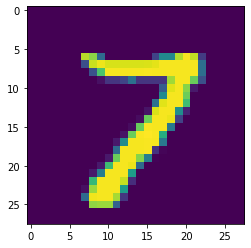

In [74]:
plt.imshow(test_images[34])

## Exercise 7:
Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?

In [75]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0 # Experiment with removing this line
#test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 2.5388
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3521
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3209
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2734
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3532
[0.0000000e+00 0.0000000e+00 2.8089357e-24 5.2168956e-20 7.6090595e-36 1.1124142e-31 0.0000000e+00 1.0000000e+00 0.0000000e+00 2.3519904e-24]
7


## Exercise 8:
Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [78]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.6): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1874/1875 [============================>.] - ETA: 0s - loss: 0.4738 - accuracy: 0.8310 ETA: 0s - loss: 0.4767 - accura
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4738 - accuracy: 0.8310


In [79]:
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

313/313 [==============================] - 1s 3ms/step - loss: 0.3863 - accuracy: 0.8631
[1.0412363e-05 1.0086576e-06 1.5601023e-05 9.0320036e-06 6.1776104e-06 3.7533402e-02 1.9750829e-05 1.4348350e-01 1.0570189e-03 8.1786412e-01]
9
